<a href="https://colab.research.google.com/github/R-Nderitu02560/Intel-Image-Classification-PROJECT_IP/blob/main/MARKET_BASKET_ANALYSIS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKET BASKET ANALYSIS IN PYTHON.**





# Research Problem 

Given the online Retail Dataset, we will be coducting the market basket analysis using the association rules. In particular the Apriori Algorithm will be used which works by first finding all frequent attributes in the data set, and then employing association rules based on two metrics, support, and confidence to identify the most important relationships.

# Defining the Metric for Success

Confidence,Support and Lift

# Understanding the Data

The dataset contains transnational transactions made on a UK-based online retail store between 01/12/2010 and 09/12/2011. It has 541909 rows and 8 columns

* InvoiceNo: a unique 6-digit number assigned to each transaction. If this code 
starts with letter ‘C’, then the order was cancelled.

* StockCode: a unique 5-digit number assigned to each distinct product.

* Description: the product name.

* Quantity: the number of each product (item) purchased per transaction.

* InvoiceDate: the date and time each transaction was completed.

* UnitPrice: the product price per unit in pounds sterling.

* CustomerID: a unique 5-digit number assigned to each customer.

* Country: the name of the country from where the purchase was made 

# Key Terms



* Association Rule: Ex. {X → Y} is a representation of finding Y on the baske which has X on it
* Itemset: Ex. {X,Y} is a representation of the list of all items which form the association rule
* Support: Fraction of transactions containing the itemset
* Confidence: Probability of occurrence of {Y} given {X} is present
* Lift: Ratio of confidence to baseline probability of occurrence of {Y}







In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#Load the data
data = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
#Displaying the first 5 rows of the dataframe
data.head()
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# **EDA**

In [ ]:
# Determining the number of records in the dataset
data.shape

(541909, 8)

In [ ]:
#Determining the column headers
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Determining unique values in each column
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
data.Description.unique()
data.Description.nunique()


4223

**Data Cleaning**

In [ ]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Dealing with outliers, anomalies, and missing data 

In [ ]:
#Checking for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Droping a null values
data.dropna(inplace=True)
data.shape

(406829, 8)

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Convert the InvoiceNo column to string.We don't want this to be interpreted as a number 
data["InvoiceNo"] = data["InvoiceNo"].astype('str')

#Remove rows with invoices that contain a "C"
data = data[~data["InvoiceNo"].str.contains("C")]

len(data)

397924

In [ ]:
#Renaming row values in the country column
data.replace({'United Kingdom':'UK', 'United Arab Emirates':'UAE'},  inplace=True)

In [ ]:
#Check the distribution of transactions per country.
top4 = data["Country"].value_counts().head(4)
top4

UK         354345
Germany      9042
France       8342
EIRE         7238
Name: Country, dtype: int64

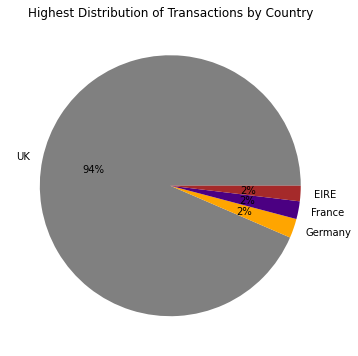

In [ ]:
#Create a pie chart to show distribution of transactions
plt.figure(figsize=[6,6])
plt.pie(top4,labels=top4.index, autopct = '%0.0f%%',colors = ( "grey","orange", "indigo", "brown"))
plt.title("Highest Distribution of Transactions by Country")
plt.show()

In [ ]:
#Check the distribution of transactions per country.
top10 = data["Country"].value_counts().head(10)
top10

UK             354345
Germany          9042
France           8342
EIRE             7238
Spain            2485
Netherlands      2363
Belgium          2031
Switzerland      1842
Portugal         1462
Australia        1185
Name: Country, dtype: int64

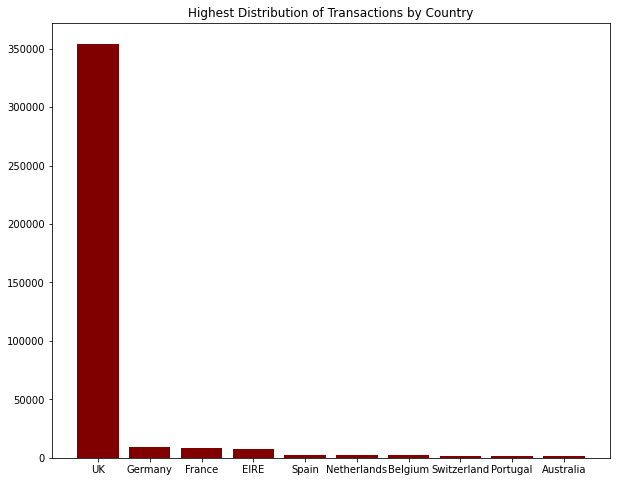

In [ ]:
#Create a bar graph to show distribution of transactions by country
plt.figure(figsize=[10,8])
plt.bar(top10.index,top10,color ='maroon')
plt.title("Highest Distribution of Transactions by Country")
plt.show()

In [ ]:
#Check the distribution of transactions per country.
last10 = data["Country"].value_counts().tail(10)
last10

Malta                 112
UAE                    68
European Community     60
RSA                    58
Lebanon                45
Lithuania              35
Brazil                 32
Czech Republic         25
Bahrain                17
Saudi Arabia            9
Name: Country, dtype: int64

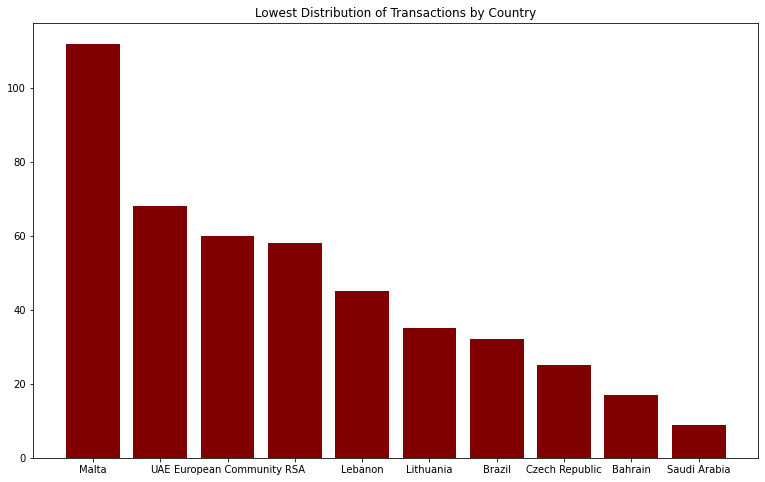

In [ ]:
#Create a bar graph to show distribution of transactions
plt.figure(figsize=[13,8])
plt.bar(last10.index,last10,color ='maroon')
plt.title("Lowest Distribution of Transactions by Country")
plt.show()

In [ ]:
#We start by filtering data for united Kingdom
#Group, sum,
#unstack>unstack the prescribed levels from row to column.
#and set index of dataframe
basket = data[data['Country'] =="UK"]\
        .groupby(['InvoiceNo', 'Description'])["Quantity"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("InvoiceNo")

basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_encoded = basket.applymap(encode_values)

basket_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#filtering invoices with 2 or more items
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]
basket_filtered

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training the Model 

In [ ]:
#Generating the frequent itemsets
frequent_itemsets = apriori(basket_filtered, min_support=0.02, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

,support,itemsets
215,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
92,0.093197,(JUMBO BAG RED RETROSPOT)
173,0.090466,(REGENCY CAKESTAND 3 TIER)
12,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
142,0.082986,(PARTY BUNTING)
115,0.072841,(LUNCH BAG RED RETROSPOT)
184,0.064971,(SET OF 3 CAKE TINS PANTRY DESIGN )
108,0.064646,(LUNCH BAG BLACK SKULL.)
138,0.061004,(PAPER CHAIN KIT 50'S CHRISTMAS )
125,0.060939,(NATURAL SLATE HEART CHALKBOARD )


In [ ]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.030957,0.031803,0.022177,0.716387,22.525889,0.021193,3.413792
1,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.031803,0.030957,0.022177,0.697342,22.525889,0.021193,3.201769
2,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.024909,0.039802,0.022177,0.890339,22.369051,0.021186,8.756089
3,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.039802,0.024909,0.022177,0.557190,22.369051,0.021186,2.202051
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031803,0.039802,0.026275,0.826176,20.756994,0.025009,5.523961
...,...,...,...,...,...,...,...,...,...
89,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE LEAF),0.093197,0.046111,0.021072,0.226099,4.903385,0.016774,1.232573
90,(SPOTTY BUNTING),(PARTY BUNTING),0.058858,0.082986,0.023348,0.396685,4.780117,0.018464,1.519958
91,(PARTY BUNTING),(SPOTTY BUNTING),0.082986,0.058858,0.023348,0.281348,4.780117,0.018464,1.309594
92,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.093197,0.072841,0.024519,0.263084,3.611774,0.017730,1.258162


Making Recommendations

In [ ]:
#Filtering based on rules
filtered_rules=assoc_rules[(assoc_rules['lift']>=5)&(assoc_rules['confidence']>=0.5)]
filtered_rules1=filtered_rules.head(10)

In [ ]:
#Reviewing the eighth case above
basket_filtered['SPACEBOY LUNCH BOX '].sum()

506

In [ ]:

basket_filtered['DOLLY GIRL LUNCH BOX'].sum()

467

Visualizing Relationship between Support, Confidence and Support

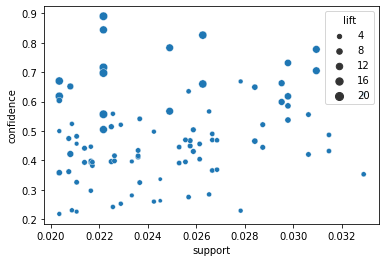

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = assoc_rules)
plt.show()

From the plot above we can deduce that we  have higher lift for higher confidence levels.

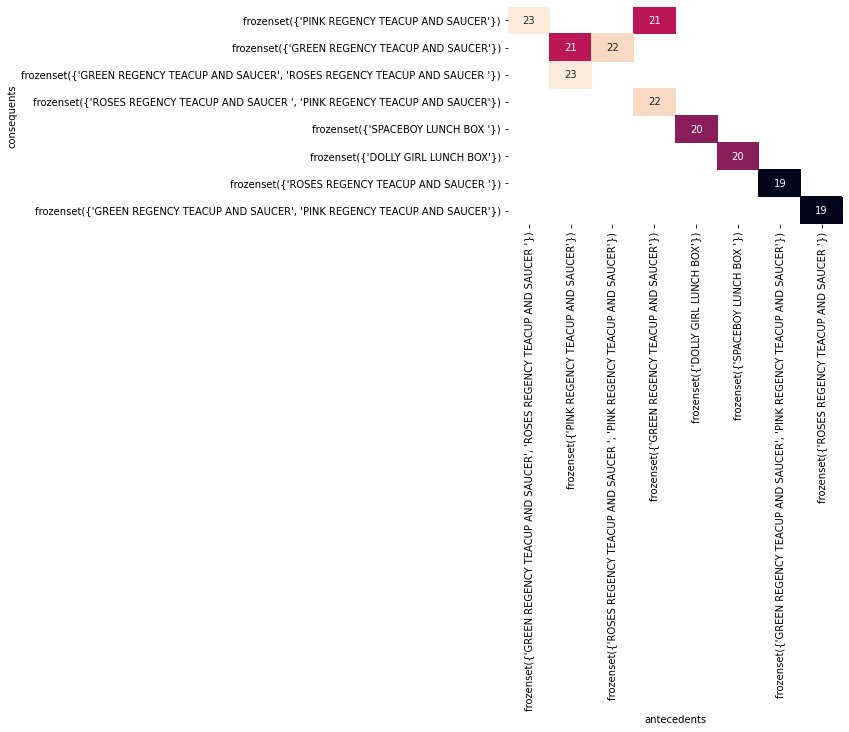

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt

# Transform the DataFrame of rules into a matrix using the lift metric

pivot = filtered_rules1.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()